<a href="https://colab.research.google.com/github/Crebizer/TEST/blob/main/5_PER%2C_ROA%2C_ROE_wget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 환경 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
#!! 중요 !! 여기까지 실행하시고 다시시작해주셔야 됩니다!!

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!cd ..&& wget -nc http://youngminhome.iptime.org:5555/shared/etc_data/web_crawling_korea_data.zip && unzip -n web_crawling_korea_data.zip

File ‘web_crawling_korea_data.zip’ already there; not retrieving.

Archive:  web_crawling_korea_data.zip


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['axes.unicode_minus'] = False
rcParams['font.family'] = 'NanumBarunGothic'

### 데이터 준비

In [ ]:
import pandas as pd
data = pd.read_csv(
                   "../데이터/재무제표_분석용데이터.csv",
                   encoding = "euc-kr",
                   usecols = ['기업', '연도', '현재_주가', '미래_주가', 'ROA', 'ROE', 'PER'],
                   )
data.dropna(inplace = True)

#### 산업군 추가

In [ ]:
stock_info_data = pd.read_csv(
    "../데이터/종목정보.txt", sep="\t", encoding="euc-kr", usecols=["Name", "Sector"]
)

data = pd.merge(data, stock_info_data, left_on="기업", right_on="Name", how="left")
data.drop(["Name"], axis=1, inplace=True)

In [ ]:
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100

In [ ]:
data.head()

,기업,연도,ROA,ROE,현재_주가,미래_주가,PER,Sector,수익률
0,3S,2016,-5.893767,-9.383155,3595.0,2320.0,43.313253,전자부품 제조업,-35.465925
1,3S,2017,-16.392325,-27.605322,2320.0,2685.0,11.047619,전자부품 제조업,15.732759
2,3S,2018,-2.892187,-4.779549,2685.0,2700.0,78.970588,전자부품 제조업,0.558659
3,3S,2019,2.645981,4.333519,2700.0,2420.0,84.375000,전자부품 제조업,-10.370370
4,BGF,2014,7.580843,26.183558,30542.0,42269.0,7.206701,기타 금융업,38.396307


### 수익률과 투자 지표 간 상관관계 확인

#### PER

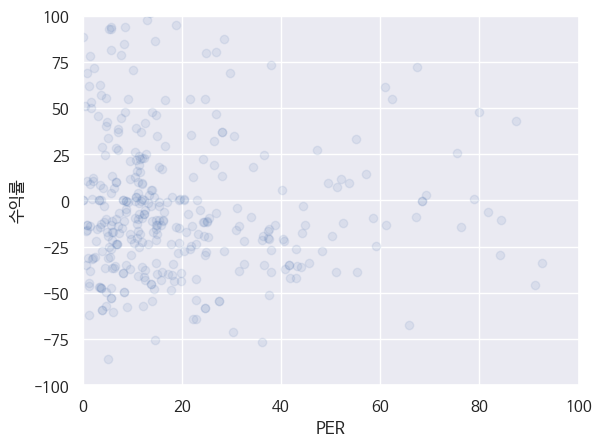

-0.09003184970756012


In [ ]:
plt.scatter(data["PER"], data["수익률"], alpha = 0.1)
plt.xlabel("PER")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()
print(data.corr("spearman").loc["PER", "수익률"])

#### ROA

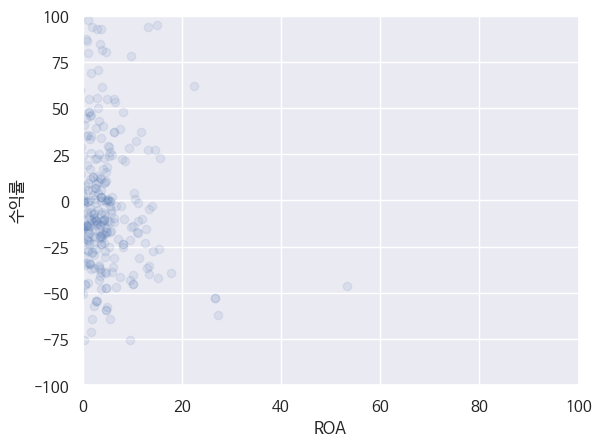

0.005251089191080683


In [ ]:
plt.scatter(data["ROA"], data["수익률"], alpha = 0.1)
plt.xlabel("ROA")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()
print(data.corr("spearman").loc["ROA", "수익률"])

#### ROE

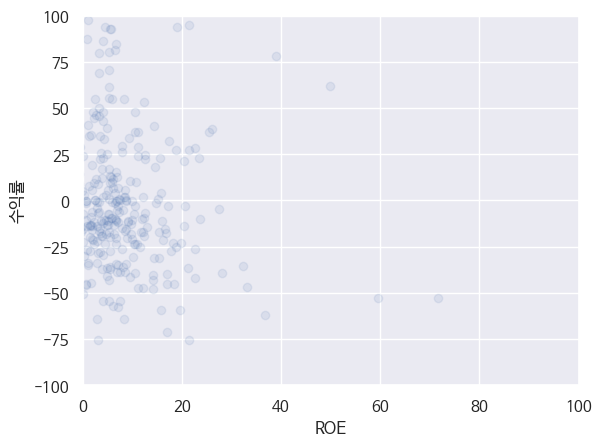

-0.004566457188120628


In [ ]:
plt.scatter(data["ROE"], data["수익률"], alpha = 0.1)
plt.xlabel("ROE")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()
print(data.corr("spearman").loc["ROE", "수익률"])

### 산업군을 고려한 수익률과 투자 지표 간 상관관계 확인

In [ ]:
display(data.drop_duplicates(['기업', 'Sector'])['Sector'].value_counts())

기타 금융업                              8
텔레비전 방송업                            4
전자부품 제조업                            3
자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업    3
특수 목적용 기계 제조업                       3
통신 및 방송 장비 제조업                      3
기타 정보 서비스업                          3
영화, 비디오물, 방송프로그램 제작 및 배급업           3
소프트웨어 개발 및 공급업                      2
상품 종합 도매업                           2
기계장비 및 관련 물품 도매업                    2
기타 화학제품 제조업                         2
1차 철강 제조업                           2
봉제의복 제조업                            2
영상 및 음향기기 제조업                       2
석유 정제품 제조업                          1
회사 본부 및 경영 컨설팅 서비스업                 1
기초 화학물질 제조업                         1
일반 목적용 기계 제조업                       1
기타 비금속 광물제품 제조업                     1
나무제품 제조업                            1
기타 운송관련 서비스업                        1
폐기물 처리업                             1
기록매체 복제업                            1
그외 기타 제품 제조업                        1
광고업                                 1
종합 소매업      

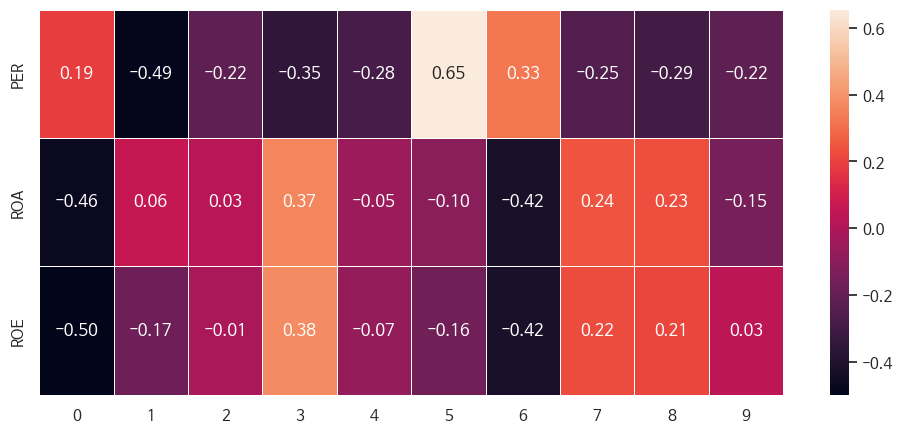

In [ ]:
result = []
top10_S = data.drop_duplicates(['기업', 'Sector'])['Sector'].value_counts().index[:10]
for col in ["PER", "ROA", "ROE"]:
    record = []
    for sector in top10_S:
        temp = data.loc[data['Sector'] == sector, [col, '수익률']].dropna()
        corr = temp.corr("spearman").iloc[0, 1]
        record.append(corr)
    result.append(record)

plt.figure(figsize = (12, 5))
sns.heatmap(result, annot=True, fmt=".2f", linewidths=0.5)
plt.yticks([0.5, 1.5, 2.5], ["PER", "ROA", "ROE"])
plt.show()

### 동일 가중 교체 매매에 따른 수익 비교

#### 전체 산업군

<Axes: >

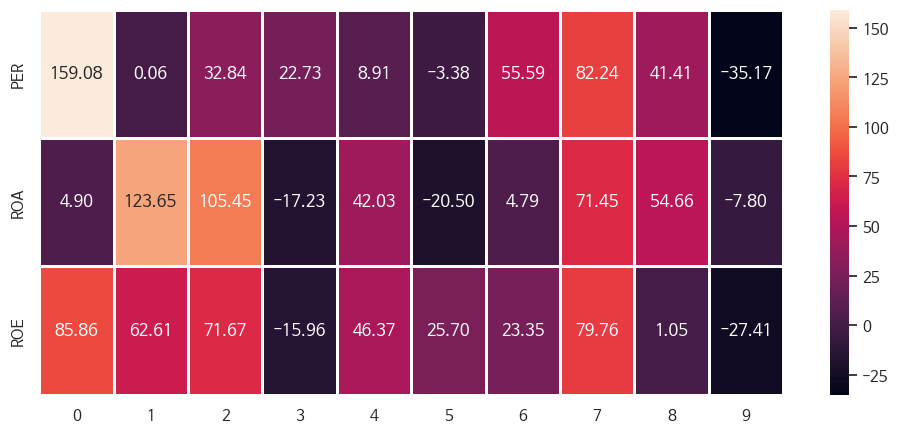

In [ ]:
import numpy as np
result = []
for col in ["PER", "ROA", "ROE"]:
    inve_list = np.array([10**8] * 10) # 투자금 초기화
    for year in range(2014, 2020):
        y_data = data.loc[data['연도'] == year]
        group_list = pd.qcut(y_data[col], 10, labels = range(10)).astype(int)
        for group in range(10):
            ror_list = y_data.loc[group_list == group, '수익률']
            inve_per_stock = inve_list[group] / len(ror_list)
            profit = (inve_per_stock * ror_list / 100).sum()
            inve_list[group] += profit
    profit_ratio_list = (inve_list - 10 ** 8) / 10 ** 8 * 100
    result.append(profit_ratio_list)
result = pd.DataFrame(result, columns = range(10), index = ["PER", "ROA", "ROE"])

plt.figure(figsize = (12, 5))
sns.heatmap(result, annot = True, linewidth = 1, fmt = ".2f")

<Axes: >

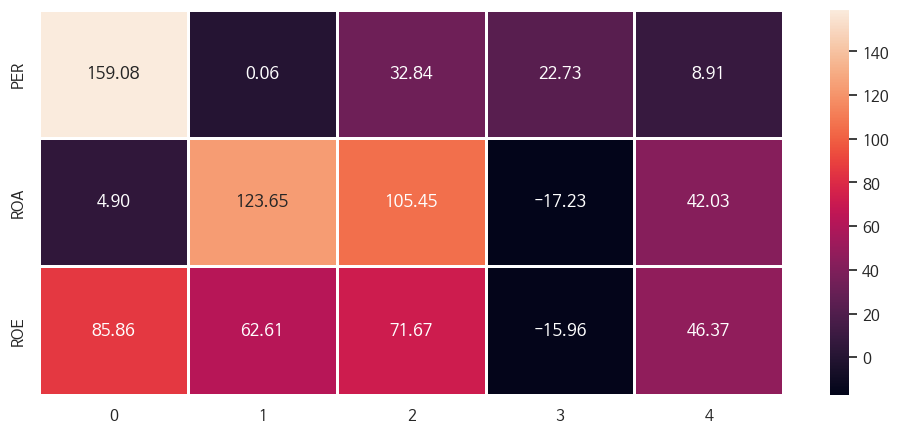

In [ ]:
import numpy as np
s_data=data.loc[data['Sector']=="소프트웨어 개발 및 공급업"]
result = []
for col in ["PER", "ROA", "ROE"]:
    inve_list = np.array([10**8] * 5) # 투자금 초기화
    for year in range(2014, 2020):
        y_data = data.loc[data['연도'] == year]
        group_list = pd.qcut(y_data[col], 10, labels = range(10)).astype(int)
        for group in range(5):
            ror_list = y_data.loc[group_list == group, '수익률']
            inve_per_stock = inve_list[group] / len(ror_list)
            profit = (inve_per_stock * ror_list / 100).sum()
            inve_list[group] += profit
    profit_ratio_list = (inve_list - 10 ** 8) / 10 ** 8 * 100
    result.append(profit_ratio_list)
result = pd.DataFrame(result, columns = range(5), index = ["PER", "ROA", "ROE"])

plt.figure(figsize = (12, 5))
sns.heatmap(result, annot = True, linewidth = 1, fmt = ".2f")